
                                                                                                    Aradhya Mathur

                            Assignment 2

                            DSC 275/475: Time Series Analysis and Forecasting
                            HW #2 (Total points: 40 for students in DSC 275;
                            50 points for students in DSC 475)
                               

Instructions:


• For each of the questions, please submit a written response that also INCLUDES the results from running the code. In addition, please attach the code. You are welcome to use Jupyter notebook (Python), Rmarkdown (R), or LiveScript (MATLAB) to combine the code and written text in one file, but the notebooks must include the code output. Please attach the original notebook file and its PDF version.


• Please note in this HW, Q2 is only for students in DSC 475. It carries 10 points. Hence, the maximum score for DSC 275 students would be 40/50. This will be weighted in the final grade calculation accordingly. Unfortunately, no extra credit for undergraduate students for attempting this problem in this homework.


• For Q1 and Q3, please do not directly apply smoothing window functions from native Python or other Time-series libraries/packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot

1. Consider the measurement data provided in the file: Measurement_Q1.xls. (15 pts)
(For Q1(a) and Q1(b) below, please do not use an external package/library to implement the moving average window)

In [2]:
mdata = pd.read_excel(r'MeasurementData_Q1.xlsx') # Reading the data
measure = mdata.Measurement
year= mdata.Year
mdata.head()

,Year,Measurement
0,1984,539.9
1,1985,558.1
2,1986,620.1
3,1987,612.5
4,1988,640.6


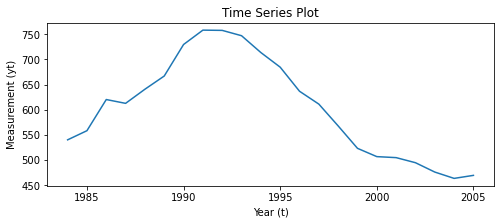

In [3]:
#Time Series Plot for Original Data
plt.figure(figsize=(8, 3))
plt.plot(year, measure)
plt.xlabel('Year (t)')
plt.ylabel('Measurement (yt)')
plt.title("Time Series Plot")
plt.show()

a. (6 pts) Use a 11-period simple moving average to smooth the data. Plot the result.

In [4]:
# Finding SMA for Period=11

period11 = 11
sma11 = []
count = len(measure)
for i in range(count-period11+1):
    j = measure[i:i+period11]
    k=j.mean() 
    l=round(k,5)
    sma11.append(l)
sma11

[667.66364,
 680.80909,
 687.94545,
 687.11818,
 683.03636,
 672.34545,
 657.76364,
 637.3,
 613.31818,
 587.69091,
 561.88182,
 539.66364]

In [5]:
# Appending null values at the start
sm11 = [] 
for x in range(period11 - 1):
    sm11 = np.append(sm11, [np.nan])
    
sma11 = np.concatenate((sm11, sma11))
sma11

array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan, 667.66364, 680.80909,
       687.94545, 687.11818, 683.03636, 672.34545, 657.76364, 637.3    ,
       613.31818, 587.69091, 561.88182, 539.66364])

In [6]:
#Inserting into table
mdata.insert(2, "sma_period_11",sma11)

In [7]:
mdata.head(22)

,Year,Measurement,sma_period_11
0,1984,539.9,NaN
1,1985,558.1,NaN
2,1986,620.1,NaN
3,1987,612.5,NaN
4,1988,640.6,NaN
5,1989,666.9,NaN
6,1990,729.6,NaN
7,1991,758.2,NaN
8,1992,757.7,NaN
9,1993,747.1,NaN


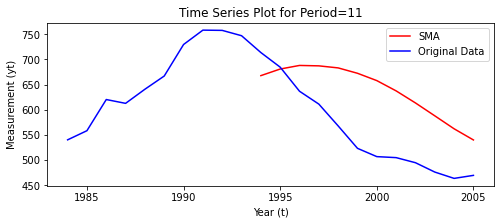

In [8]:
#Plotting Time series Original Data vs SMA 
plt.figure(figsize=(8, 3))
plt.xlabel('Year (t)')
plt.ylabel('Measurement (yt)')
plt.title("Time Series Plot for Period=11")
plt.plot(year, mdata.sma_period_11, color='red', label='SMA')
plt.plot(year, measure, color='blue', label='Original Data')
plt.legend()
pyplot.show()


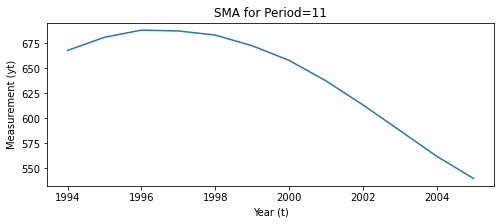

In [9]:
#SMA for Period=11
plt.figure(figsize=(8, 3))
plt.plot(year, mdata.sma_period_11)
plt.xlabel('Year (t)')
plt.ylabel('Measurement (yt)')
plt.title("SMA for Period=11")
plt.show()

b. (6 pts) Repeat the procedure with a 5-period simple moving average. Plot the result.

In [10]:
# Finding SMA for Period=5
period5 = 5
sma5 = []
for i in range(count-period5+1):
    j = measure[i:i+period5]
    k=j.mean() 
    l=round(k,5)
    sma5.append(l)
sma5

[594.24,
 619.64,
 653.94,
 681.56,
 710.6,
 731.9,
 741.24,
 732.22,
 707.9,
 678.56,
 642.66,
 604.54,
 568.94,
 542.52,
 519.2,
 500.84,
 488.88,
 481.42]

In [11]:
#Appending Null values
sm5 = []
for x in range(period5 - 1):
    sm5 = np.append(sm5, [np.nan])
    
sma5 = np.concatenate((sm5, sma5))
sma5

array([   nan,    nan,    nan,    nan, 594.24, 619.64, 653.94, 681.56,
       710.6 , 731.9 , 741.24, 732.22, 707.9 , 678.56, 642.66, 604.54,
       568.94, 542.52, 519.2 , 500.84, 488.88, 481.42])

In [12]:
#Inserting into table
mdata.insert(3, "sma_period_5",sma5)

In [13]:
mdata.head(22)

,Year,Measurement,sma_period_11,sma_period_5
0,1984,539.9,NaN,NaN
1,1985,558.1,NaN,NaN
2,1986,620.1,NaN,NaN
3,1987,612.5,NaN,NaN
4,1988,640.6,NaN,594.24
5,1989,666.9,NaN,619.64
6,1990,729.6,NaN,653.94
7,1991,758.2,NaN,681.56
8,1992,757.7,NaN,710.60
9,1993,747.1,NaN,731.90


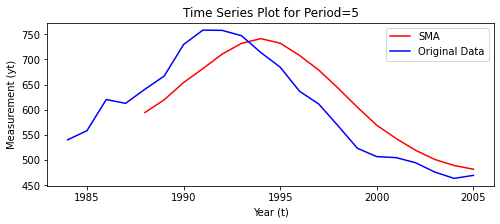

In [14]:
#Time Series plot for Original Data vs SMA
plt.figure(figsize=(8, 3))
plt.xlabel('Year (t)')
plt.ylabel('Measurement (yt)')
plt.title("Time Series Plot for Period=5")
plt.plot(year, mdata.sma_period_5, color='red', label='SMA')
plt.plot(year, measure, color='blue', label='Original Data')
plt.legend()
pyplot.show()

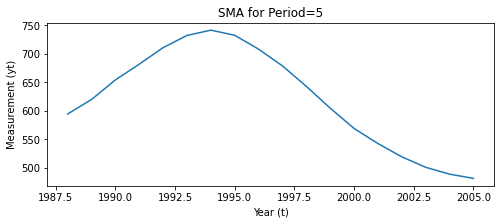

In [15]:
# SMA for Period=11
plt.figure(figsize=(8, 3))
plt.plot(year, mdata.sma_period_5)
plt.xlabel('Year (t)')
plt.ylabel('Measurement (yt)')
plt.title("SMA for Period=5")
plt.show()

c) (3 pts) What is the effect of changing the span (length) of the simple moving average window? Explain briefly

Choosing the length of span can be a problem. For a shorter span (like 5), simple moving average reacts faster. So, if we are considering time, span length=5 is better than span length=11 But another factor to consider is variance. Variance decreases with increase in span. Variance for span length=11 will be less than that of span length=5. 
While finding the optimal span length we have to cosider both the parameters.

2. (FOR GRADUATE STUDENTS – DSC 475 ONLY) (10 pts)

a. (3 pts) Consider the N-span simple moving average applied to data that are uncorrelated with mean μ and variance σ2. Show that the variance of the moving average is Var(Mt) = 𝜎2/𝑁.

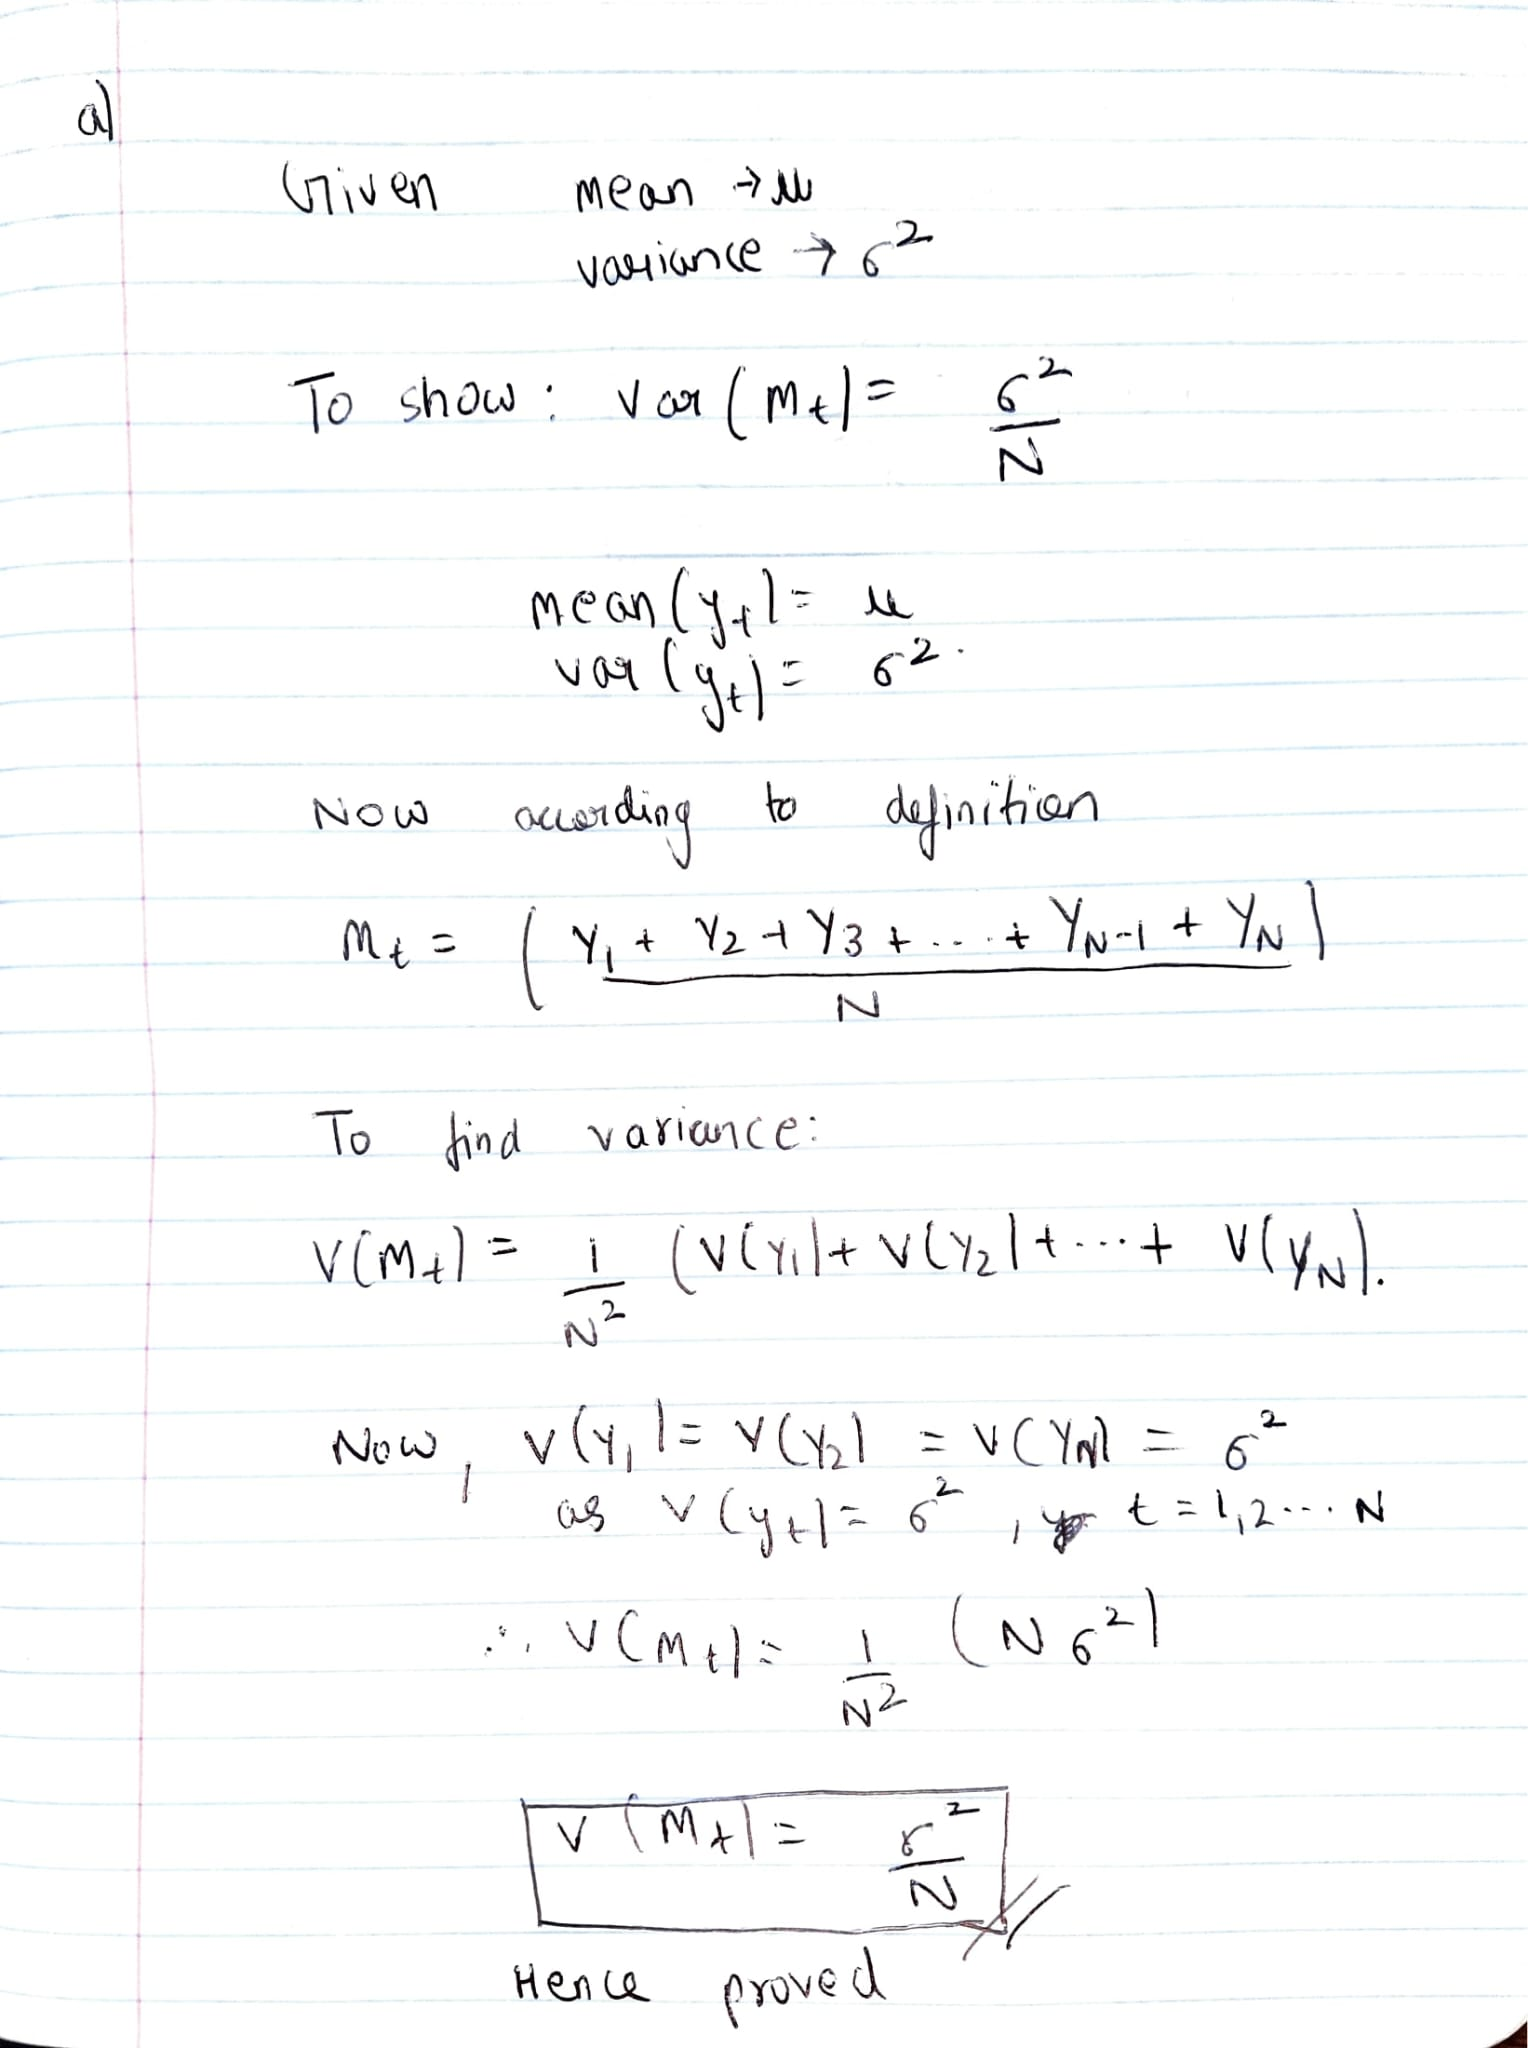

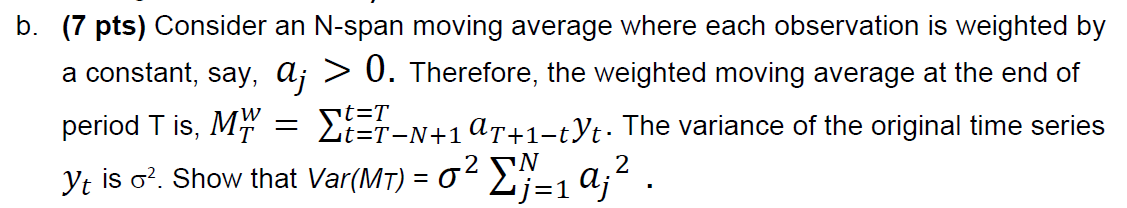

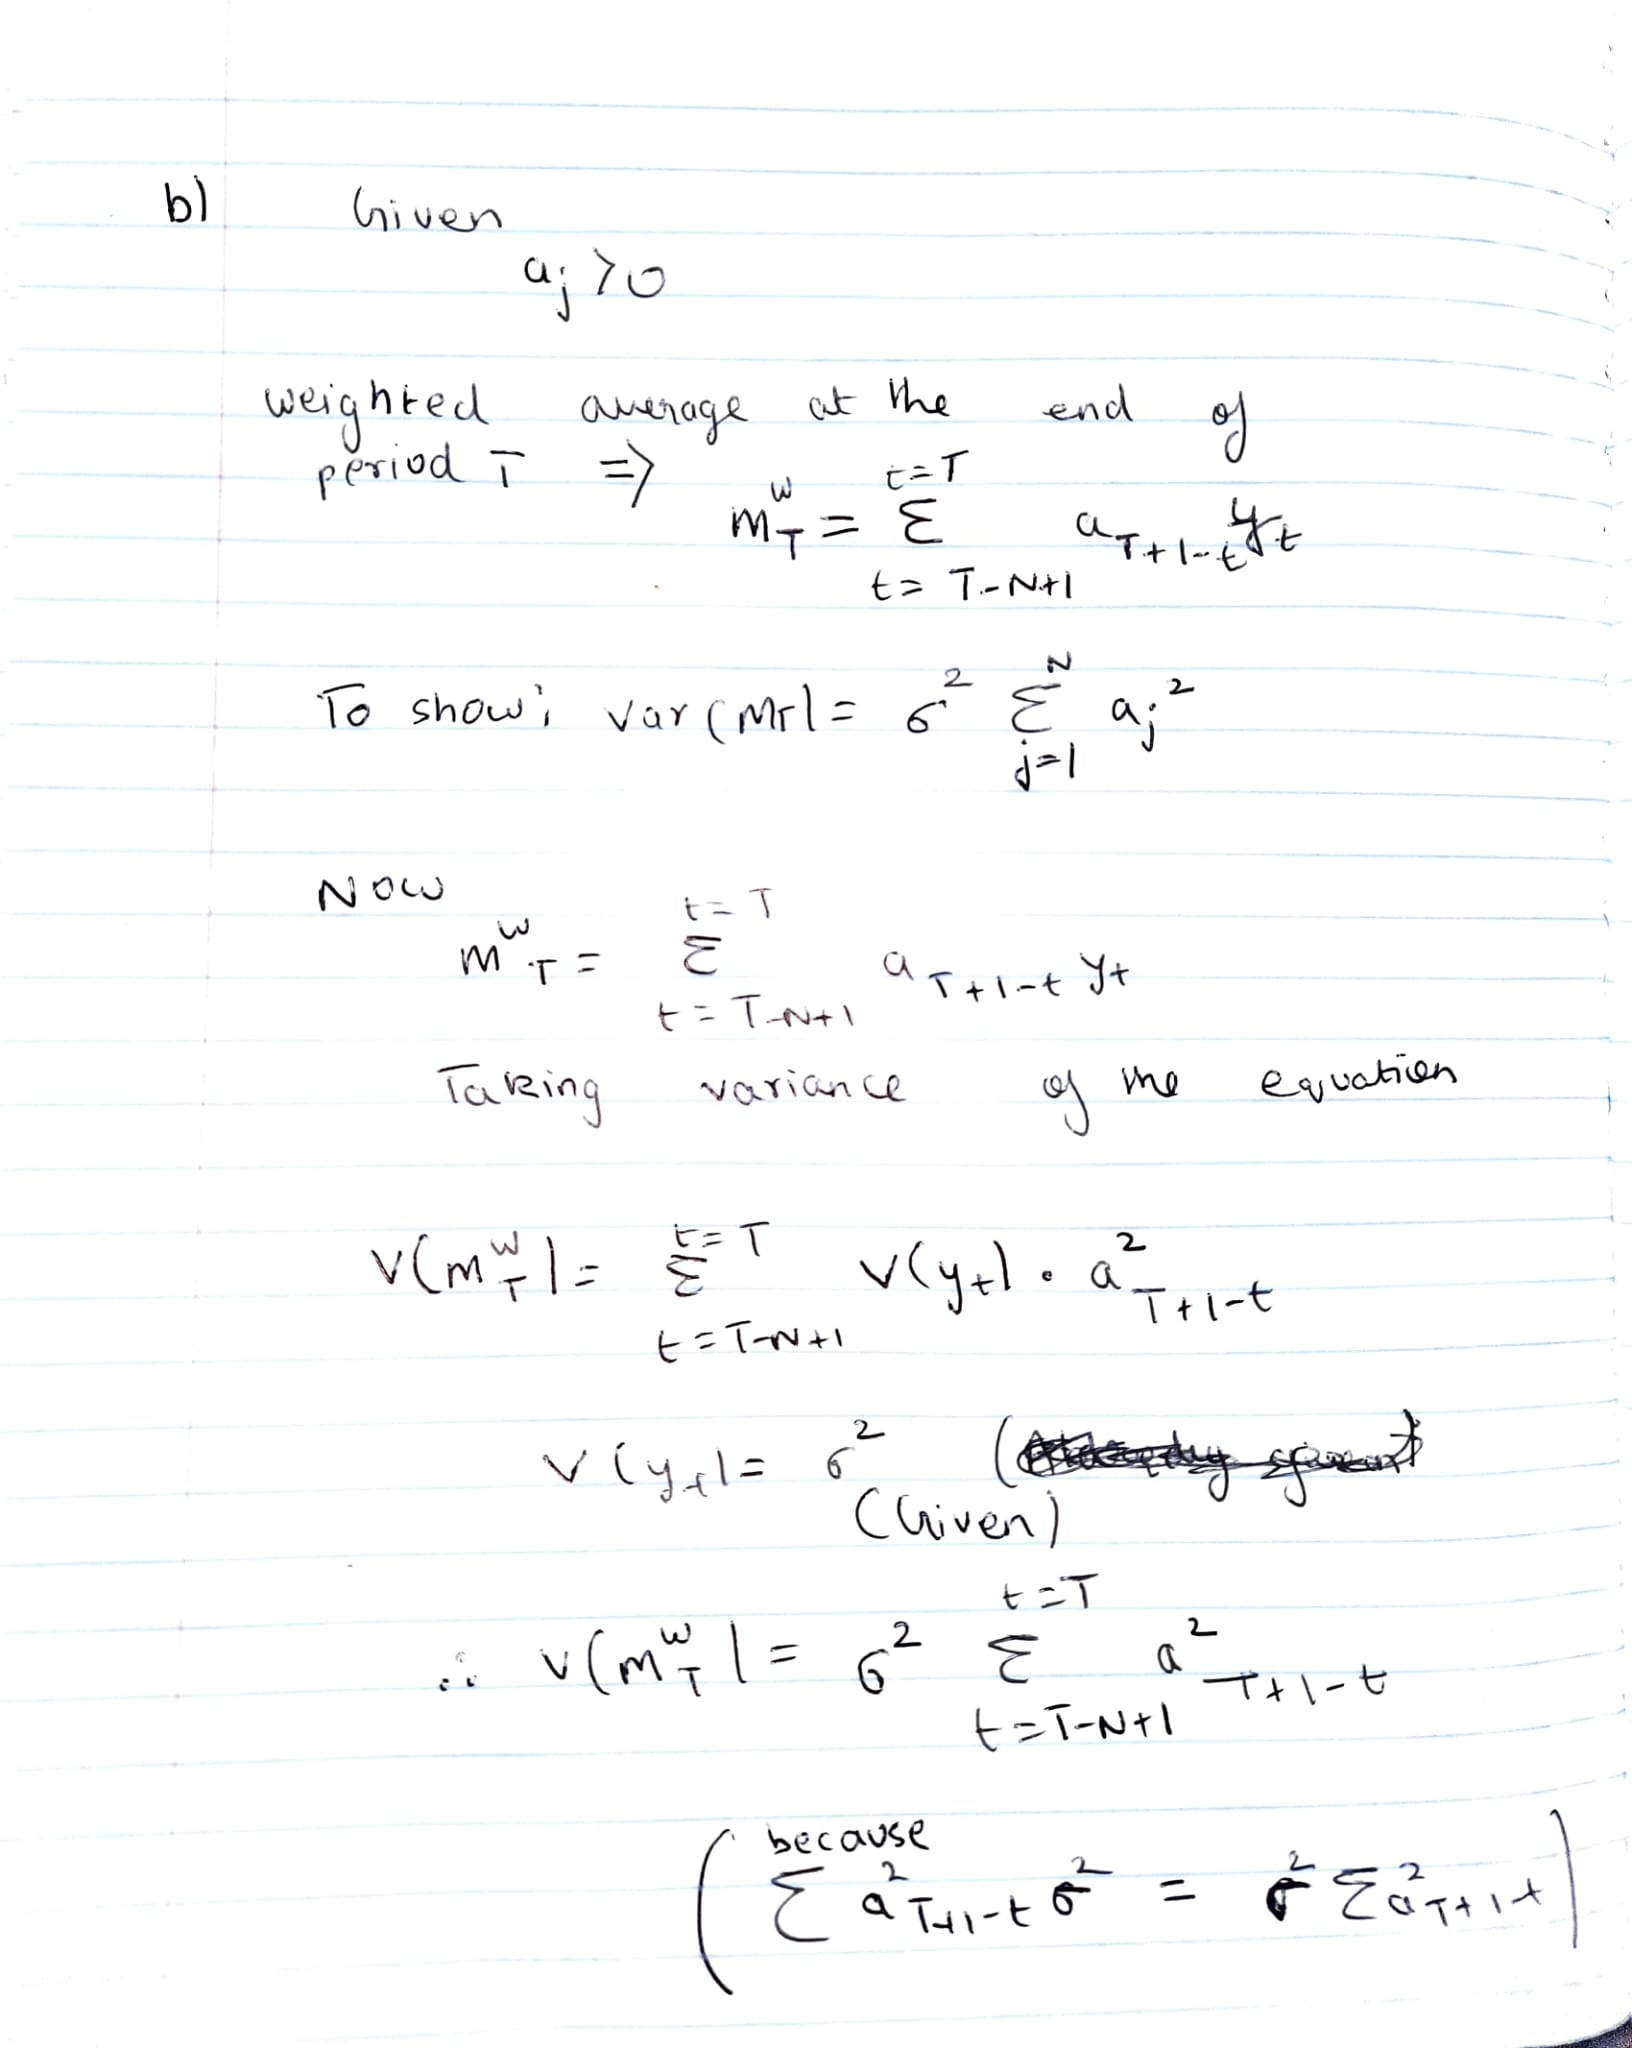

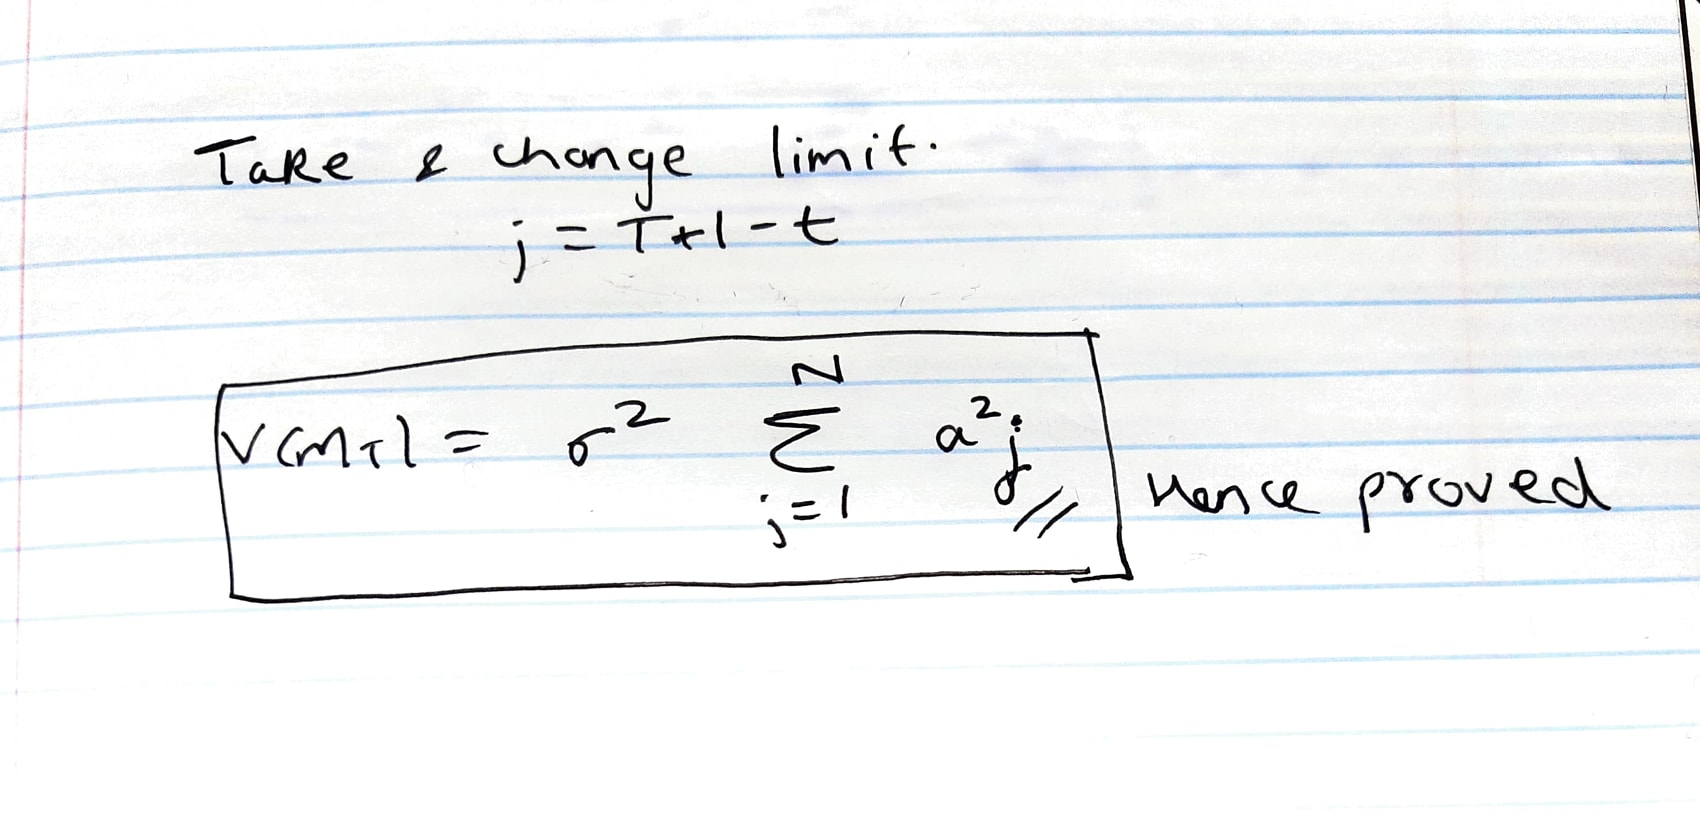

3. The file: Yield_Data.xls presents data on the hourly yield from a chemical process.


In [16]:
#Reading Data
yielddf = pd.read_excel(r'Yield_Data.xlsx')
yielddf.columns = ['Hour','Yield_Percentage']
yielddf

,Hour,Yield_Percentage
0,1,89.0
1,2,90.5
2,3,91.5
3,4,93.2
4,5,93.9
5,6,94.6
6,7,94.7
7,8,93.5
8,9,91.2
9,10,89.3


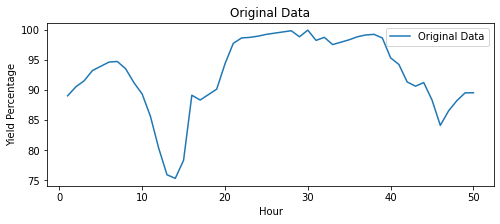

In [17]:
#Time Series Plot for Original Data
plt.figure(figsize=(8, 3))
plt.plot(yielddf['Hour'],yielddf['Yield_Percentage'] , label='Original Data')
plt.title('Original Data')
plt.xlabel('Hour')
plt.ylabel('Yield Percentage')
plt.legend()
plt.show()

a. (10 pts) Use simple (first order) exponential smoothing with λ = 0.2 to smooth the data. Plot the result.

In [18]:
ydf= yielddf['Yield_Percentage']
l=len(ydf)
hour = yielddf['Hour']
index = ydf.index

In [19]:
#Exponential Smoothing for Lambda = 0.2 (ESL2 stands for exponential smoothing lambda=0.2)
l2=0.2
esl2 = [ydf[0]]
for i in range(1,l):
    j = l2*ydf[i]+(1-l2)*esl2[i-1] 
    esl2.append(j)

esl2   

[89.0,
 89.30000000000001,
 89.74000000000001,
 90.43200000000002,
 91.12560000000002,
 91.82048000000002,
 92.39638400000001,
 92.61710720000002,
 92.33368576000001,
 91.72694860800001,
 90.50155888640002,
 88.46124710912002,
 85.94899768729603,
 83.81919814983682,
 82.71535851986945,
 83.99228681589557,
 84.85382945271645,
 85.72306356217317,
 86.59845084973853,
 88.13876067979082,
 90.05100854383267,
 91.76080683506613,
 93.1486454680529,
 94.29891637444233,
 95.27913309955387,
 96.1033064796431,
 96.80264518371449,
 97.4021161469716,
 97.68169291757728,
 98.12535433406184,
 98.14028346724947,
 98.25222677379958,
 98.10178141903967,
 98.06142513523174,
 98.1091401081854,
 98.24731208654833,
 98.41784966923868,
 98.57427973539095,
 98.57942378831277,
 97.92353903065022,
 97.17883122452018,
 96.00306497961616,
 94.92245198369294,
 94.17796158695435,
 93.00236926956349,
 91.2218954156508,
 90.27751633252065,
 89.86201306601652,
 89.78961045281322,
 89.73168836225058]

In [20]:
#Insrting into table
yielddf.insert(2, "ES_Lambda=0.2",esl2)
yielddf.head()

,Hour,Yield_Percentage,ES_Lambda=0.2
0,1,89.0,89.0000
1,2,90.5,89.3000
2,3,91.5,89.7400
3,4,93.2,90.4320
4,5,93.9,91.1256


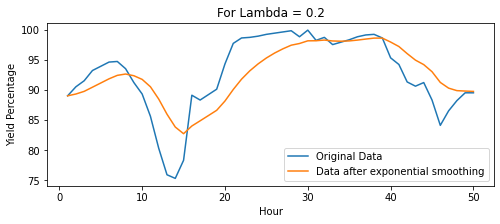

In [21]:
#Plotting Time series for Original Data vs Simple Exponential Smoothing
plt.figure(figsize=(8, 3))
plt.plot(hour,ydf , label='Original Data')
plt.plot(hour, esl2, label='Data after exponential smoothing')
plt.title('For Lambda = 0.2')
plt.xlabel('Hour')
plt.ylabel('Yield Percentage')
plt.legend()
plt.show()

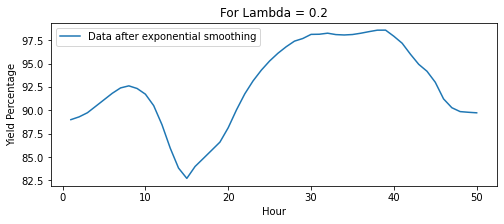

In [22]:
#Plotting Simple Exponential Smoothing
plt.figure(figsize=(8, 3))
plt.plot(hour, esl2, label='Data after exponential smoothing')
plt.title('For Lambda = 0.2')
plt.xlabel('Hour')
plt.ylabel('Yield Percentage')
plt.legend()
plt.show()

b. (5 pts) Change the smoothing constant (λ) to λ = 0.8. Smooth the data with this new value of λ. Plot the result.

In [23]:
#Exponential Smoothing for Lambda = 0.8  (ESL8 stands for exponential smoothing lambda=0.8)
l8=0.8
esl8 = [ydf[0]]
for i in range(1,l):
    j = l8*ydf[i]+(1-l8)*esl8[i-1] 
    esl8.append(j)
    
esl8

[89.0,
 90.2,
 91.24,
 92.80799999999999,
 93.6816,
 94.41631999999998,
 94.643264,
 93.72865279999999,
 91.70573056,
 89.78114611199999,
 86.4362292224,
 81.52724584447999,
 77.025449168896,
 75.6450898337792,
 77.76901796675584,
 86.83380359335116,
 88.00676071867022,
 88.96135214373405,
 89.8722704287468,
 93.41445408574936,
 96.84289081714988,
 98.24857816342997,
 98.609715632686,
 98.8419431265372,
 99.12838862530745,
 99.34567772506149,
 99.5491355450123,
 99.74982710900247,
 98.98996542180049,
 99.7179930843601,
 98.50359861687201,
 98.6607197233744,
 97.73214394467487,
 97.86642878893498,
 98.21328575778699,
 98.68265715155741,
 99.01653143031147,
 99.16330628606231,
 98.71266125721246,
 95.98253225144248,
 94.5565064502885,
 91.9513012900577,
 90.87026025801154,
 91.13405205160231,
 88.86681041032045,
 85.05336208206408,
 86.21067241641282,
 87.80213448328256,
 89.16042689665652,
 89.43208537933131]

In [24]:
#Inserting into table
yielddf.insert(3, "ES_Lambda=0.8",esl8)
yielddf.head()

,Hour,Yield_Percentage,ES_Lambda=0.2,ES_Lambda=0.8
0,1,89.0,89.0000,89.0000
1,2,90.5,89.3000,90.2000
2,3,91.5,89.7400,91.2400
3,4,93.2,90.4320,92.8080
4,5,93.9,91.1256,93.6816


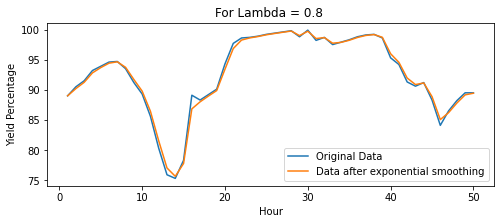

In [25]:
#Plotting Time series for Original Data vs Simple Exponential Smoothing
plt.figure(figsize=(8, 3))
plt.plot(hour,ydf, label='Original Data')
plt.plot(hour, esl8,  label='Data after exponential smoothing')
plt.title('For Lambda = 0.8 ')
plt.xlabel('Hour')
plt.ylabel('Yield Percentage')
plt.legend()
plt.show()

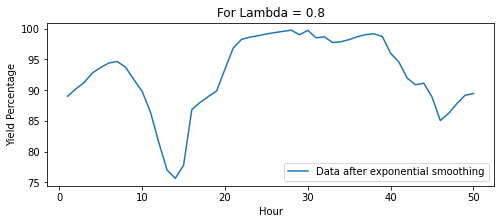

In [26]:
#Plotting Simple Exponential Smoothing
plt.figure(figsize=(8, 3))
plt.plot(hour, esl8, label='Data after exponential smoothing')
plt.title('For Lambda = 0.8')
plt.xlabel('Hour')
plt.ylabel('Yield Percentage')
plt.legend()
plt.show()

In [27]:
yielddf

,Hour,Yield_Percentage,ES_Lambda=0.2,ES_Lambda=0.8
0,1,89.0,89.000000,89.000000
1,2,90.5,89.300000,90.200000
2,3,91.5,89.740000,91.240000
3,4,93.2,90.432000,92.808000
4,5,93.9,91.125600,93.681600
5,6,94.6,91.820480,94.416320
6,7,94.7,92.396384,94.643264
7,8,93.5,92.617107,93.728653
8,9,91.2,92.333686,91.705731
9,10,89.3,91.726949,89.781146


c. (10 pts) Compute the Mean Square Difference between the original data and the smoothed data for λ = 0.2 and λ = 0.8. Which smoothing constant produced a lower error?

In [28]:
#MSE for Lambda = 0.2
mse2 = np.square(np.subtract(ydf,esl2)).mean()  
mse2

15.671048945737006

In [29]:
#MSE for Lambda = 0.8 
mse8 = np.square(np.subtract(ydf,esl8)).mean()  
mse8

0.2950579416051249

Mean square error for Lambda=0.2 is 15.6710489 and for Lambda=0.8 is 0.2950579416.



For lambda=0.8, MSE is lower. From the plot it is evident that smoothed values follow observations more closely for lambda=0.8 and hence MSE is lower. For λ=0.8 , there is less bias. 